<a href="https://colab.research.google.com/github/ZeeshanKazim/NeuralNetwork/blob/main/NNDLCheckpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel('/content/E-Commerce Dataset.xlsx')
df_dict = pd.read_excel('/content/E Commerce Dataset Data Dics.xlsx')

df.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


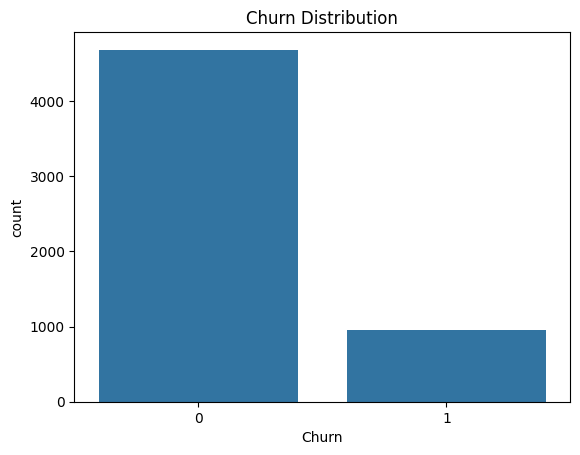

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


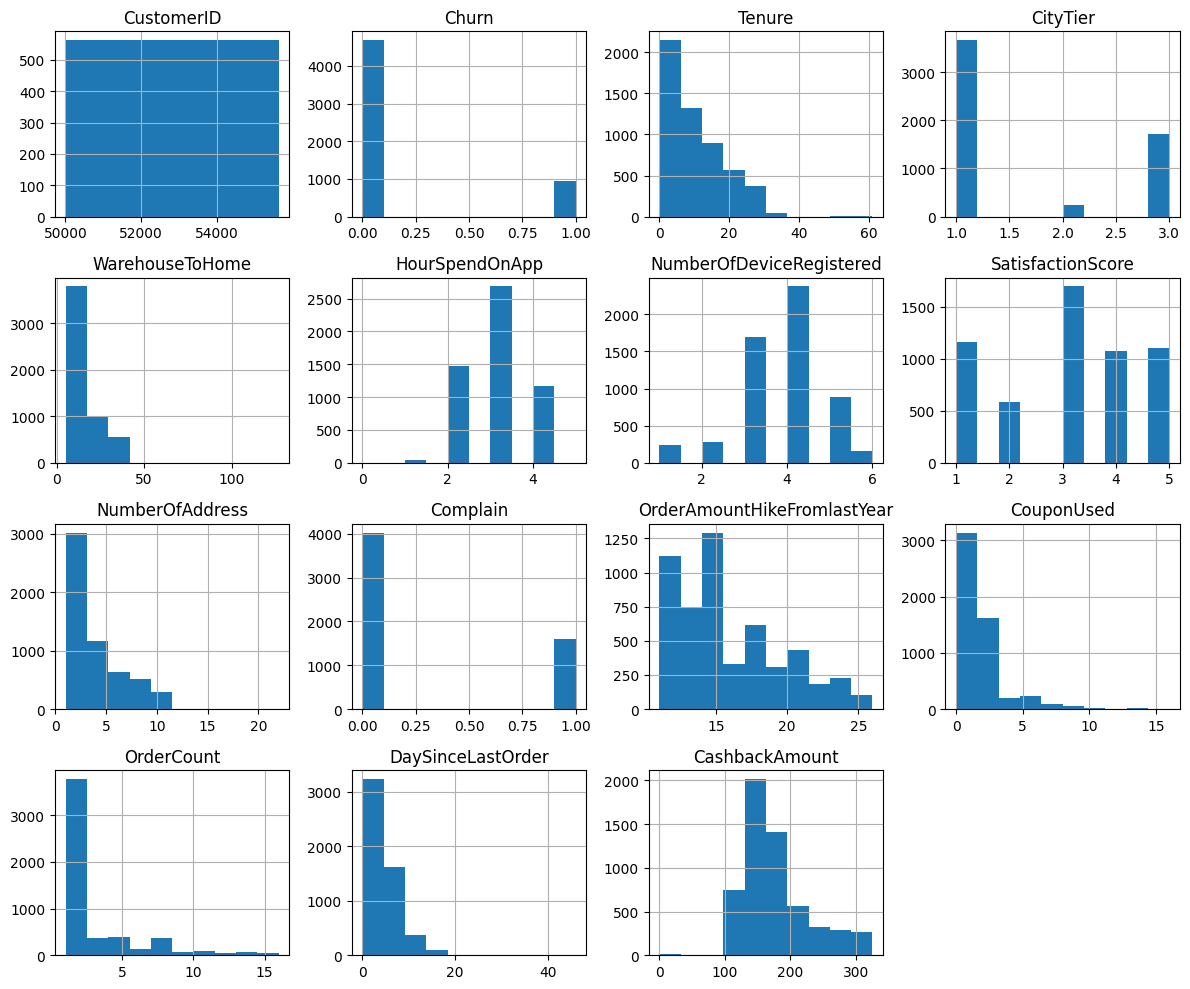

In [ ]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()


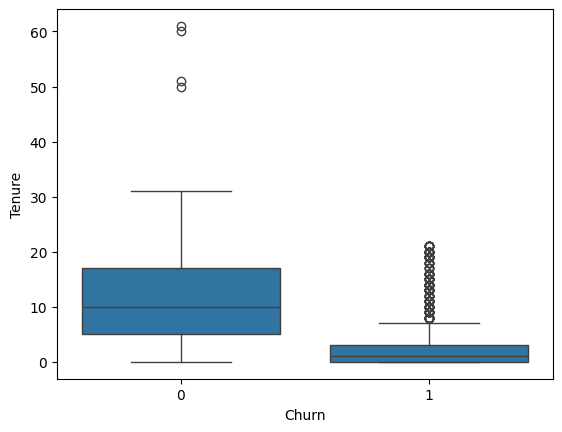

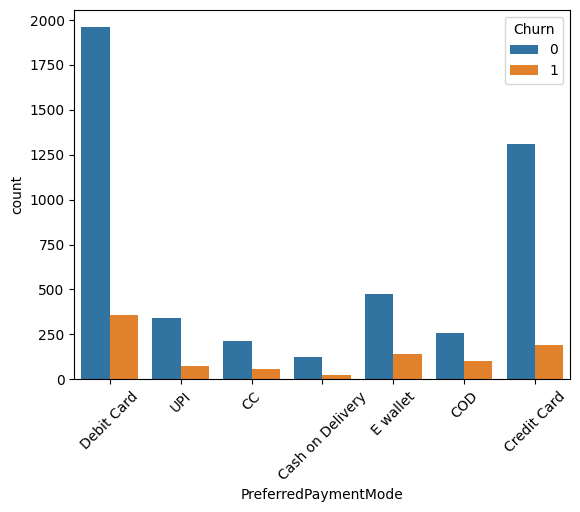

In [ ]:
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.show()

sns.countplot(data=df, x='PreferredPaymentMode', hue='Churn')
plt.xticks(rotation=45)
plt.show()


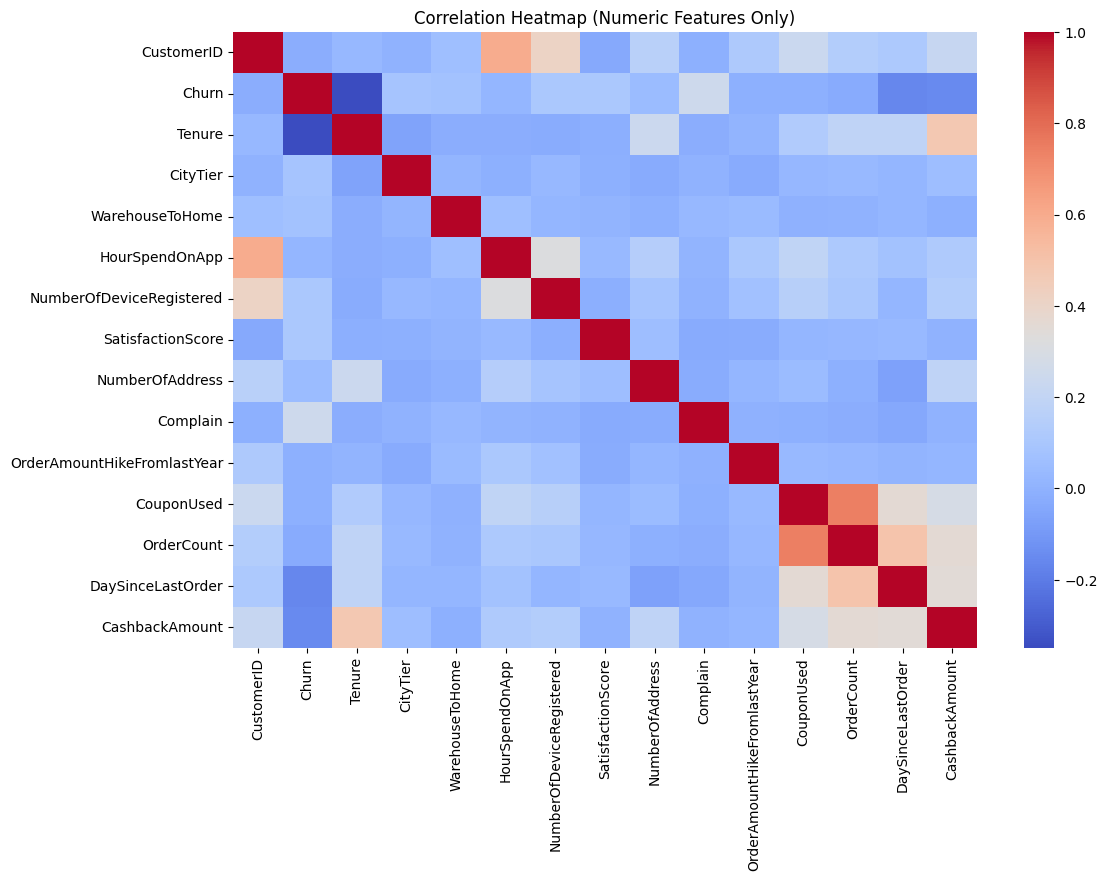

In [ ]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



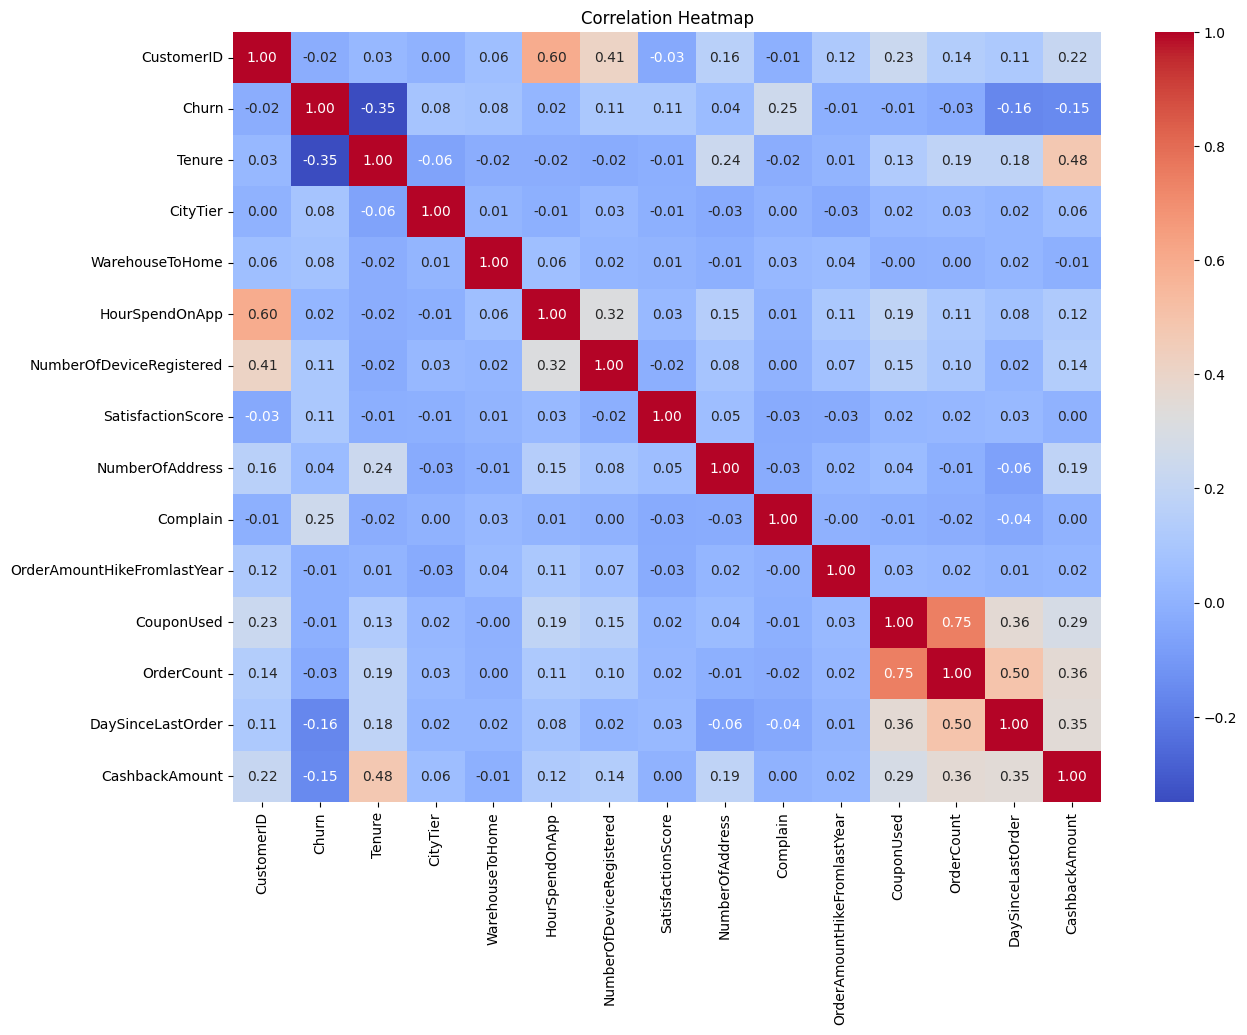

In [ ]:
plt.figure(figsize=(14,10))
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


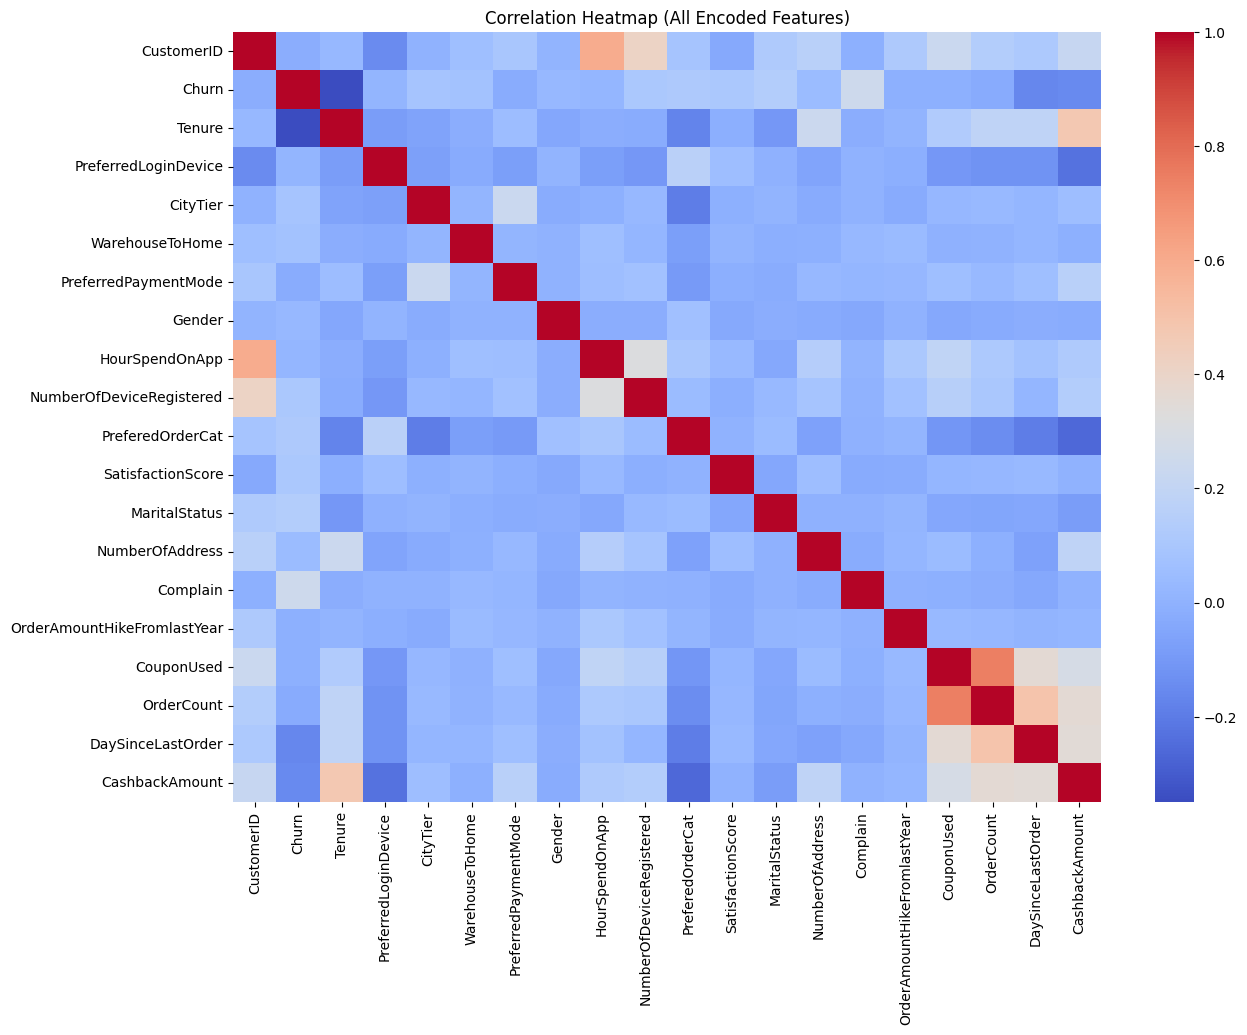

In [ ]:
df_encoded = df.copy()

from sklearn.preprocessing import LabelEncoder

for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (All Encoded Features)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

# Label encode categorical variables
for col in df2.select_dtypes(include='object'):
    df2[col] = LabelEncoder().fit_transform(df2[col].astype(str))

X = df2.drop('Churn', axis=1)
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df2 = df.copy()

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
for col in df2.select_dtypes(include='object'):
    df2[col] = LabelEncoder().fit_transform(df2[col].astype(str))

# Fill numeric missing values with median
df2 = df2.fillna(df2.median())


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

# Encode categorical variables
for col in df2.select_dtypes(include='object'):
    df2[col] = LabelEncoder().fit_transform(df2[col].astype(str))

# Impute missing values
imputer = SimpleImputer(strategy='median')
df2[df2.columns] = imputer.fit_transform(df2)


In [ ]:
lr = LogisticRegression(max_iter=2000)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

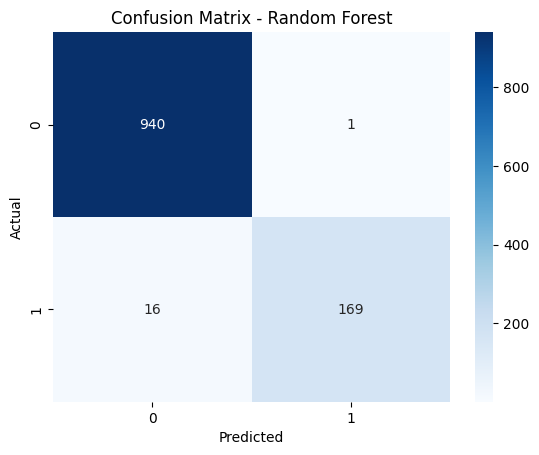

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
print("Extra in X_test:", set(X_test.columns) - set(X_train.columns))
print("Missing in X_test:", set(X_train.columns) - set(X_test.columns))


Extra in X_test: set()
Missing in X_test: set()


In [ ]:
# ---------------------------------------------------------------
# FINAL FIX — CLEAN, RESET, REBUILD MODELS WITH MATCHING FEATURES
# ---------------------------------------------------------------

import pandas as pd

# 1) Reload your dataset
df2 = df.copy()   # Make sure df is your original dataframe

# 2) DROP THE ID COLUMN NOW (so it never appears again)
if 'CustomerID' in df2.columns:
    df2 = df2.drop(columns=['CustomerID'])

# 3) Split into X and y
X = df2.drop(columns=['Churn'])
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 4) Identify numeric and categorical columns
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# 5) Preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # FIXED
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# 6) Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('lr', LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# 7) FIT BOTH MODELS — CLEAN, FRESH FIT
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# 8) Predict correctly — no CustomerID mismatch anymore
from sklearn.metrics import accuracy_score

pred_lr = lr_pipeline.predict(X_test)
pred_rf = rf_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))


Logistic Regression Accuracy: 0.91651865008881
Random Forest Accuracy: 0.9724689165186501
